In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
data_50 = np.array(pd.read_csv('data/data2D.csv', header=None))
data_1000 = np.array(pd.read_csv('data/data1000D.csv', header=None))

In [41]:
def pca(dataset, d, compute_mean=False, compute_sd=False):
    mean_dataset = np.mean(dataset, axis=0)
    sd_dataset = np.std(dataset, axis=0)
    if compute_mean:
        dataset = dataset-mean_dataset
    if compute_sd:
        dataset = dataset/sd_dataset
    U, S, Vh = np.linalg.svd(dataset, full_matrices=False)
    z = np.dot(dataset, Vh[:d].T)
    reconstruction_ = np.dot(z, Vh[:d])
    if compute_mean and not compute_sd:
        reconstruction_ += mean_dataset
    elif compute_sd and compute_mean:
        reconstruction_ = reconstruction_*sd_dataset+mean_dataset
    return z, (U, S, Vh), reconstruction_, mean_dataset, sd_dataset

In [24]:
def pca_error(dataset, reconstructions):
    return np.sum((dataset-reconstructions)**2)/len(dataset)

In [53]:
def dro(dataset, d):
    b = np.mean(dataset, axis=0)
    dataset_ = dataset-b
    U, S, Vh = np.linalg.svd(dataset_, full_matrices=False)
    z = np.sqrt(dataset.shape[0])*U[:, :d]
    A = np.dot(np.diag(S[:d]), Vh[:d]).T/np.sqrt(dataset.shape[0])
    reconstruction = np.dot(z, A.T)+b
    return z, (U, S, Vh), reconstruction, A, b 

for data2D.csv

In [42]:
all_errors = []

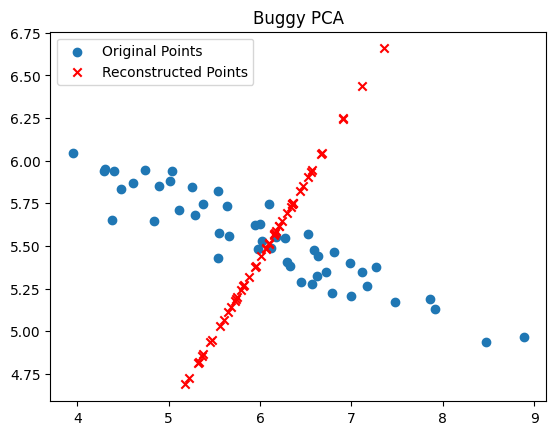

In [43]:
#Buggy PCA
z, params, reconstruction_, mean_dataset, sd_dataset = pca(data_50, 1)
plt.scatter(data_50[:, 0], data_50[:, 1], marker='o')
all_errors.append(pca_error(data_50, reconstruction_))
plt.scatter(reconstruction_[:, 0], reconstruction_[:, 1], marker='x', color='red')
plt.legend(["Original Points", "Reconstructed Points"])
plt.title("Buggy PCA")
plt.savefig('buggy_2d.png')

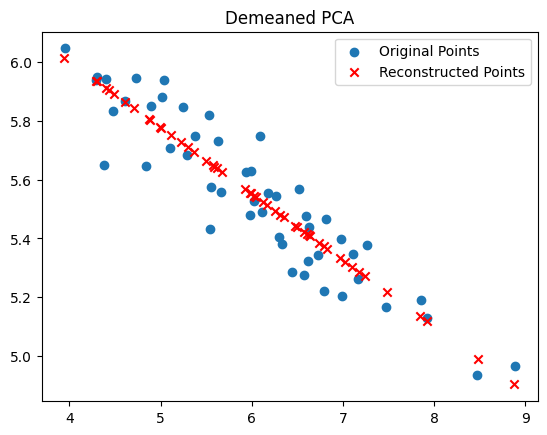

In [44]:
#Demeaned PCA
z, params, reconstruction_, mean_dataset, sd_dataset = pca(data_50, 1, compute_mean=True)
plt.scatter(data_50[:, 0], data_50[:, 1], marker='o')
all_errors.append(pca_error(data_50, reconstruction_))
plt.scatter(reconstruction_[:, 0], reconstruction_[:, 1], marker='x', color='red')
plt.legend(["Original Points", "Reconstructed Points"])
plt.title("Demeaned PCA")
plt.savefig('demeaned_2d.png')

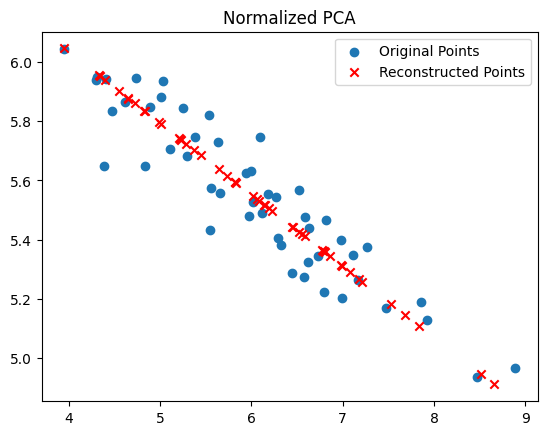

In [45]:
#Normalized PCA
z, params, reconstruction_, mean_dataset, sd_dataset = pca(data_50, 1, compute_mean=True, compute_sd=True)
plt.scatter(data_50[:, 0], data_50[:, 1], marker='o')
all_errors.append(pca_error(data_50, reconstruction_))
plt.scatter(reconstruction_[:, 0], reconstruction_[:, 1], marker='x', color='red')
plt.legend(["Original Points", "Reconstructed Points"])
plt.title("Normalized PCA")
plt.savefig('normalized_2d.png')

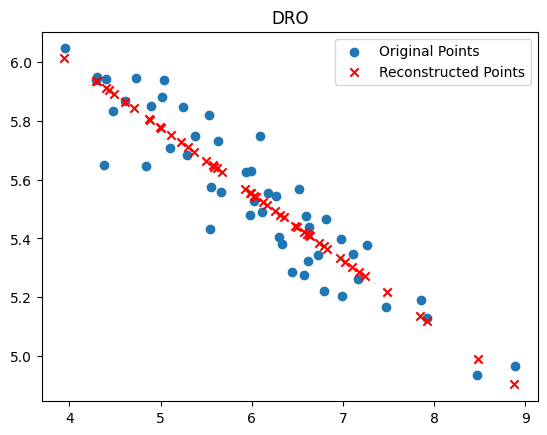

In [54]:
#DRO
z, params, reconstruction_, A, b = dro(data_50, 1)
plt.scatter(data_50[:, 0], data_50[:, 1], marker='o')
all_errors.append(pca_error(data_50, reconstruction_))
plt.scatter(reconstruction_[:, 0], reconstruction_[:, 1], marker='x', color='red')
plt.legend(["Original Points", "Reconstructed Points"])
plt.title("DRO")
plt.savefig('dro_2d.png')

In [56]:
from tabulate import tabulate
methods = ["Buggy PCA", "Demeaned PCA", "Normalized PCA", "DRO"]
data = list(zip(methods, all_errors))

headers = ["Method", "Reconstruction Error"]

table = tabulate(data, headers=headers, tablefmt="fancy_grid")
print(table)

╒════════════════╤════════════════════════╕
│ Method         │   Reconstruction Error │
╞════════════════╪════════════════════════╡
│ Buggy PCA      │              0.886903  │
├────────────────┼────────────────────────┤
│ Demeaned PCA   │              0.0100061 │
├────────────────┼────────────────────────┤
│ Normalized PCA │              0.0494721 │
├────────────────┼────────────────────────┤
│ DRO            │              0.0100061 │
╘════════════════╧════════════════════════╛


for data_1000.csv

In [57]:
U, S, Vh = np.linalg.svd(data_1000-np.mean(data_1000, axis=0), full_matrices=False)

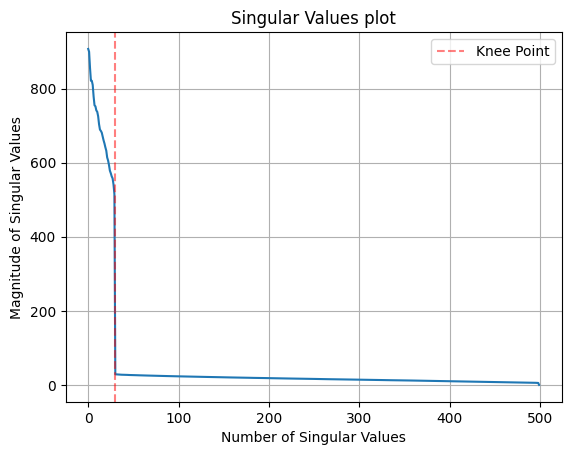

In [70]:
plt.plot(S)
plt.grid(True)
plt.axvline(x=30, color='r', linestyle='--', label='Knee Point', alpha=0.5)
plt.xlabel("Number of Singular Values")
plt.ylabel("Magnitude of Singular Values")
plt.title("Singular Values plot")
plt.legend()
plt.savefig("sing_plot.png")

In [71]:
d = 30

In [75]:
all_errors = []

#Buggy PCA
z, params, reconstruction_, mean_dataset, sd_dataset = pca(data_1000, d)
all_errors.append(pca_error(data_1000, reconstruction_))

#Demeaned PCA
z, params, reconstruction_, mean_dataset, sd_dataset = pca(data_1000, d, compute_mean=True)
all_errors.append(pca_error(data_1000, reconstruction_))

#Normalized PCA
z, params, reconstruction_, mean_dataset, sd_dataset = pca(data_1000, d, compute_mean=True, compute_sd=True)
all_errors.append(pca_error(data_1000, reconstruction_))

#DRO
z, params, reconstruction_, A, b = dro(data_1000, d)
all_errors.append(pca_error(data_1000, reconstruction_))

In [76]:
all_errors

[802.7313986203584, 273.04595897860275, 273.62858099762326, 273.0459589786028]

In [77]:
from tabulate import tabulate
methods = ["Buggy PCA", "Demeaned PCA", "Normalized PCA", "DRO"]
data = list(zip(methods, all_errors))

headers = ["Method", "Reconstruction Error"]

table = tabulate(data, headers=headers, tablefmt="fancy_grid")
print(table)

╒════════════════╤════════════════════════╕
│ Method         │   Reconstruction Error │
╞════════════════╪════════════════════════╡
│ Buggy PCA      │                802.731 │
├────────────────┼────────────────────────┤
│ Demeaned PCA   │                273.046 │
├────────────────┼────────────────────────┤
│ Normalized PCA │                273.629 │
├────────────────┼────────────────────────┤
│ DRO            │                273.046 │
╘════════════════╧════════════════════════╛
